<a href="https://colab.research.google.com/github/hank199599/deep_learning_keras_log/blob/main/Chapter2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2-1 初探神經網路：第一支神經網路


## MINIST 資料集圖片辨識
深度學習的「Hello World!」
1. 載入mnist資料集，含(train_images,train_labels)和(test_images,test_labels)
2. 用兩個Dense層架構(network.add())了一個神經網路
3. 用network.compile()來編譯神經網路，此時要指定optimmizer、loss、metrices三個參數
4.要將輸入資料集做前處理，用reshape()和astype()來做 
5. 對輸入的標籤做分類標碼
6. 用network.fit()來進行訓練
7. 用network.evaluate()評估成果

In [ ]:
# 在Keras中載入MNIST資料集
from keras.datasets import mnist

(train_images,train_labels),(test_images,test_labels) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


查看驗證資料

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
len(train_labels)

60000

In [ ]:
train_labels
#標籤是0-9之間的數字，資料型別是unit8

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

查看測試資料

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
len(test_labels)

10000

In [ ]:
test_labels
#標籤是0-9之間的數字，資料型別是unit8

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

## 整體操作流程
①  我們提供訓練集 train_images 和 train_labels 給神經網路  
②  神經網路學習把圖片加以歸類,並且和每張圖片的標籤對比,如果歸類錯誤就加以修正。  
③最後,我們要求神經網路對 test_images 中的圖片進行預測、並進行驗證,確 認是否與 test_labels 中記錄的標籤符合。
 

神經網路架構

### **密集層**/全連接層(fully connected)  
![pic-1](https://ithelp.ithome.com.tw/upload/images/20190925/20120549IXrUJjgcpN.png)  
指前後層的神經元彼此連接在一起，  
前一層神經元皆對應到後一層的神經元。

In [ ]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512,activation="relu",input_shape=(28*28,)))
network.add(layers.Dense(10,activation='softmax'))

In [ ]:
network.compile(
    optimizer = 'rmsprop', # 指定優化器→控制梯度下降的確切規則
    loss = 'categorical_crossentropy', # 指定損失函數
    metrics = ['accuracy'] # 指定評量準則
)

### 準備圖片資料
reshape 跟 astype 是 NumPy 陣列的method

In [ ]:
train_images = train_images.reshape((60000,28*28))
train_images = train_images.astype('float32')/ 255

test_images = test_images.reshape((10000,28*28))
test_images = test_images.astype('float32')/ 255

對標籤進行分類標碼

In [ ]:
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

### 進行訓練

In [ ]:
network.fit(train_images,train_labels,epochs=5,batch_size=128)

Epoch 1/5
469/469 [==============================] - 5s 10ms/step - loss: 0.2570 - accuracy: 0.9257
Epoch 2/5
469/469 [==============================] - 5s 10ms/step - loss: 0.1034 - accuracy: 0.9691
Epoch 3/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0689 - accuracy: 0.9794
Epoch 4/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0503 - accuracy: 0.9848
Epoch 5/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0383 - accuracy: 0.9887


### 進行測試

In [ ]:
test_loss , test_acc = network.evaluate(test_images,test_labels)
print('test_acc:',test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0645 - accuracy: 0.9806
test_acc: 0.9805999994277954


# 2-2 張量 Tensor

## 張量的類別

In [ ]:
import numpy as np

### 純量 (0D張量)
只包含一個數值的張量

In [ ]:
x = np.array(12)
x

array(12)

In [ ]:
x.ndim

0

### 向量 (1D張量) vector
由一組數值排列而成的陣列

In [ ]:
x = np.array([12,3,6,14,7])
x

array([12,  3,  6, 14,  7])

In [ ]:
x.ndim

1

### 矩陣 (2D張量)
一個矩陣

In [ ]:
x = np.array([[5,78,2,34,0],
        [6,79,3,35,1],
        [7,80,4,36,2]])

In [ ]:
x.ndim

2

### 高階張量 (3D張量與其上)
將多個矩陣包裝在一個新陣列中

In [ ]:
x = np.array([[[5,78,2,34,0],
        [6,79,3,35,1],
        [7,80,4,36,2]],
        [[5,78,2,34,0],
        [6,79,3,35,1],
        [7,80,4,36,2]],
        [[5,78,2,34,0],
        [6,79,3,35,1],
        [7,80,4,36,2]]])

In [ ]:
x.ndim

3

## 張量屬性
* 軸的數量(階數)：ndim
* 形狀：描述一個張量上每個軸有多少個維度
* 資料型別(dtype)：張量所存放的型別
 * float32
 * unit8
 * float64
 * char:Numpy中不存在字串張量

In [ ]:
from keras.datasets import mnist

(train_images,train_labels),(test_images,test_labels) = mnist.load_data() 

ndim屬性

In [ ]:
print(train_images.ndim)

3


張量的形狀

In [ ]:
print(train_images.shape)

(60000, 28, 28)


dtype(資料型別)

In [ ]:
print(train_images.dtype)

uint8


train_images 是一個由8為元整數所組成的3D張量。  
由 60000個 28×28的矩陣組成  
每個矩陣是一個灰階圖像，像素值在0~255之間

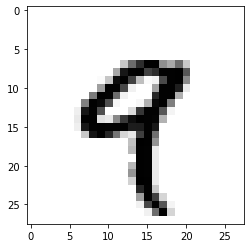

In [ ]:
digit = train_images[4]

import matplotlib.pyplot as plt
plt.imshow(digit,cmap=plt.cm.binary)
plt.show()

## 張量切片 Tensor Slicing

In [ ]:
my_slice = train_images[10:100]
print(my_slice.shape)

(90, 28, 28)


In [ ]:
my_slice = train_images[10:100, : , : ]
print(my_slice.shape)

(90, 28, 28)


In [ ]:
my_slice = train_images[10:100,0:28,0:28]
print(my_slice.shape)

(90, 28, 28)


## 資料批次(batch)
深度學習模型不會一次學習整個模型，而是將資料分成一小批一小批來學習。  
這些批次向量被稱為批次軸或批次維度。

# 2-3 張量運算

## 元素間的運算
以relu運算為例

### 透過for迴圈運算

In [ ]:
def naive_relu(x):
  assert len(x.shape) == 2 ," x 不是2D張量"

  x = x.copy()
  for i in range(x.shape[0]):
    for j in range(x.shape(1)):
      x[i,j] = max(x[i,j],0)
  
  return x

In [ ]:
def naive_add(x,y):
  assert len(x.shape) == 2
  assert x.shape == y.shape

  x = x.copy()
  for i in range(x.shape[0]):
    for j in range(x.shape(1)):
      x[i,j] += y[i,j]
  
  return x

### 向量化執行 (vectorized implementations)

```python
import numpy as np

z = x + y
z = x * y
z = np.maximun(z,0.)
```



## 張量擴張(Broadcasting)
使較小的張量進行擴張以匹配形狀較大的張量

① 較小的向量會加入新的軸，以匹配較大的向量  
② 較小的向量會在這些新的軸重複寫入元素，以匹配較大張量的shape

### 透過for迴圈運算

In [ ]:
def naive_add_matrix_and_vector(x,y):
  assert len(x.shape) == 2 ," x 不是2D張量"
  assert len(y.shape) == 1 ," x 不是2D張量"
  assert x.shape[1] == y.shape[0]

  x = x.copy()
  for i in range(x.shape[0]):
    for j in range(x.shape(1)):
      x[i,j] += y[j]
  
  return x

### 向量化執行 (vectorized implementations)



In [ ]:
import numpy as np

z = np.random.random((64,3,32,10))
y = np.random.random((32,10))

z = np.maximum(x,y)
z.shape

ValueError: ignored

## 點積運算 (dot)

In [ ]:
def naive_vector_dot(x,y):
  assert len(x.shape) == 1
  assert len(y.shape) == 1
  assert x.shape[0] == y.shape[0]
  z = 0.
  for i in range(x,shape[0]):
    z += x[i] * j[i]
  return z

In [ ]:
import numpy as np

def native_matrix_vector_dot(x,y):
  assert len(x.shape) == 2
  assert len(y.shape) == 1
  assert x.shape[1] == y.shape[0]

  z = np.zeros(z.shape[0])
  for i in range(x.shape[0]):
    for j in range(x.shape[1]):
      z[i] += x[i,j] * y[j]
  
  return z

In [ ]:
def native_matrix_vector_dot(x,y):
  z = np.zeros(x.shape[0])
  for i in range(x.shape[0]):
    z[i] = native_vector_dot(x[i,:],y)
  return z

## 張量重塑 (reshaping)
調整各軸的元素數

In [ ]:
x = np.array([[0.,1.],
        [2.,3.],
        [4.,5.]])

print(x.shape)

In [ ]:
x = x.reshape((6,1))
x

In [ ]:
x = x.reshape((2,3))
x

### 矩陣轉置(transposition)
使x[i,:] 變成 [:,i]

In [ ]:
x = np.zeros((300,20))
x = np.transpose(x)
print(x.shape)

# 2-4 以梯度為基礎的最佳化

```
output = relu(dot(W,input)+b)
```
權重(weights)/可訓練參數(trainable parameters):W、b → **屬性張量**  
* W ：內核(kernel)
* b ：偏值(bias)
  
**訓練循環**  
① 取出一批訓練樣本x和對應的目標y  
② 以x為輸入資料，開始執行神經網路(正向傳遞)已獲得預測值y_pred  
③ 計算神經網路的批次量損失值(y與y_pred間的差距)  
④ 更新神經網路的所有權重值，以稍微減少損失值  
  
![2-1](https://github.com/hank199599/deep_learning_keras_log/blob/main/pictures/2-1.png?raw=true)

## [隨機梯度下降](https://colab.research.google.com/github/hank199599/data_science_from_scratch_reading_log/blob/main/Chapter8.ipynb#scrollTo=8ftOmpRQ__rB&line=1&uniqifier=1)
1. 函數f(x)在x點的斜率就是該函數的導函數f'(x)

2. 函數f(W) 在W點的梯度就是該函數的張量導函數f'(W)   
  
![2-2](https://github.com/hank199599/deep_learning_keras_log/blob/main/pictures/2-2.png?raw=true)

## 小批次隨機梯度下降(mini-batch stochastic gradient descent,mini-batch SGD)
① 取出一批次量的訓練樣本x和對應的目標y  
② 以x為輸入資料，開始執行神經網路(正向傳遞)已獲得預測值y_pred  
③ 計算神經網路的批次量損失值(y與y_pred間的差距)  
④ 計算損失值對神經網路權重的梯度(反向傳播)  
⑤ 將參數稍微往梯度的反方向移動，如 W -= step*gradient，降低一點批次的損失  

## 連串的導數：反向傳播 Backpropagation
自最終的損失值開始，從最後面層像前面反向運作  
透過連鎖法則(train rule)來計算每個神經網路參數
使用具符號微分(symbolic differentiation)運算能力的框架來建構神經網路